# Numeros aletorios
Algoritmo simple para generar numeros aleatorios. Las librerias `random` y `numpy.random` utilizan algoritmos mas complejos.

Generar numeros aleatorios entre 0 y $m-1$. Linear congrential generator (LCG)
$$ c_{i+1} = (a c_{i} + b) \mod m$$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
c0 = 7 # semilla
a = 4
b = 1
m = 15
c1 = (a * c0 + b) %  m
print(c1)

14


In [3]:
c2 = (a*c1 + b) % m
print(c2)

12


Continuar recursivamente. Para esto creamos una funcion.

In [4]:
def LCG_func(a,b,m,c0, N):
  c = [c0]
  for i in range(N):
    ci = (a*c[i]+b) % m
    c.append(ci)
  return c

In [5]:
LCG_func(4, 1, 15, 7, 20)

[7, 14, 12, 4, 2, 9, 7, 14, 12, 4, 2, 9, 7, 14, 12, 4, 2, 9, 7, 14, 12]

Si se desea flotantes se divide cada numero entre $m$. Numeros aleatorios se refiere a numeros con poca correlacion y periodos grandes.  

Se repite el patron cada seis elementos. Problemas!

In [6]:
numeros_aleatorios = np.array(LCG_func(2**18+1, 7, 2**32, 314159, 1000))/2**32

## Prueba serial (grafica)

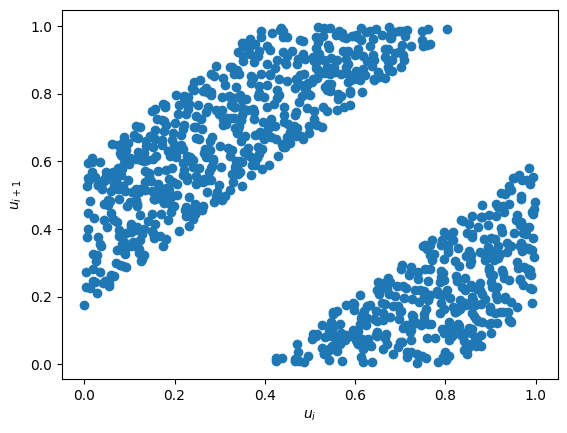

In [7]:
plt.figure()
plt.scatter(numeros_aleatorios[:-1],numeros_aleatorios[1:])
plt.xlabel(r'$u_i$')
plt.ylabel(r'$u_{i+1}$')
plt.show()

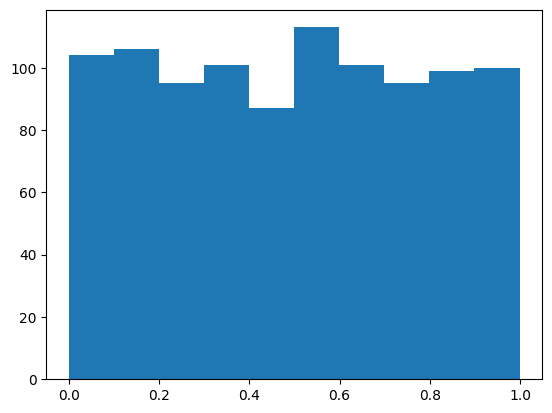

In [8]:
plt.figure()
plt.hist(numeros_aleatorios)
plt.show()

Probar con $a = 1812433253$, que sucede?


# Ejercicio
1. Esoger otros parametros e investigar el periodo
2. Generar 1000 puntos aleatorios y graficar las parejas $(u_i, u_{i+1})$

# Generar numeros (pseudo) aleatorios con `random`

La libreria `random` usa el algoritmo Mersenne Twister. Utiliza un primo de Mersenne como periodo. En esta libreria se utiliza el numero $ 2^{19937}-1$.

La funcion `random` genera flotante aleatorio uniformemente distribuido en el intervalo $[0.0,1)$.

In [9]:
random.seed(24) # semilla definida
for i in range(11):
  print(random.random())

0.7123429878269185
0.8397997363118733
0.18259188695451745
0.9982826275179507
0.19409547872374744
0.6708867302659983
0.09178661335919236
0.7577369809057047
0.15130025749194376
0.7065646893037225
0.7244493284983917


In [10]:
random.seed() # semilla aleatoria
for i in range(10):
  print(random.random())

0.20793651035711147
0.6860303176660859
0.6724658936078398
0.14797365357888304
0.5109555572708185
0.29524524216874015
0.1539489403606601
0.33134616285070473
0.04480692930215047
0.1895540834842362


In [11]:
random.seed(7)
x = [random.random() for i in range(200)]

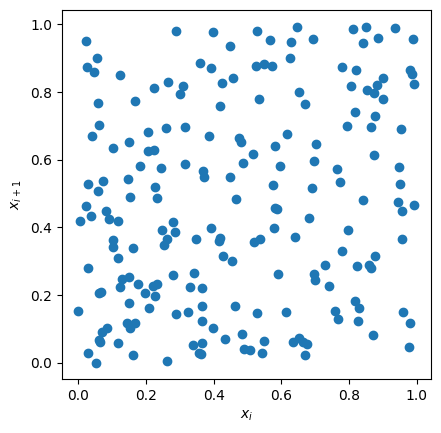

In [12]:
plt.figure()
ax = plt.gca()
plt.scatter(x[:-1], x[1:])
plt.xlabel(r'$x_i$')
plt.ylabel(r'$x_{i+1}$')
ax.set_aspect(1)
plt.show()

<Axes: ylabel='Count'>

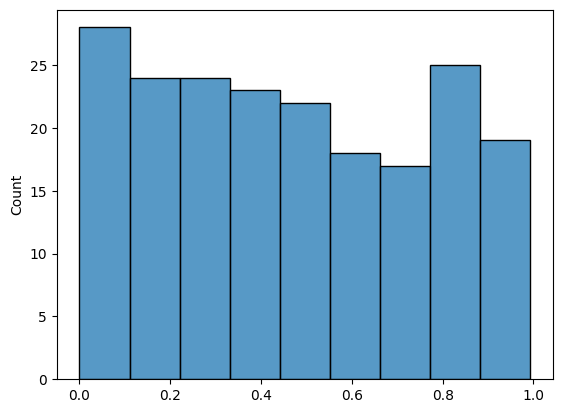

In [13]:
sns.histplot(x)

In [14]:
%%time
random.seed(4)
y = [random.gauss(0.5, 0.25) for i in range(1000)]

CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 5.12 ms


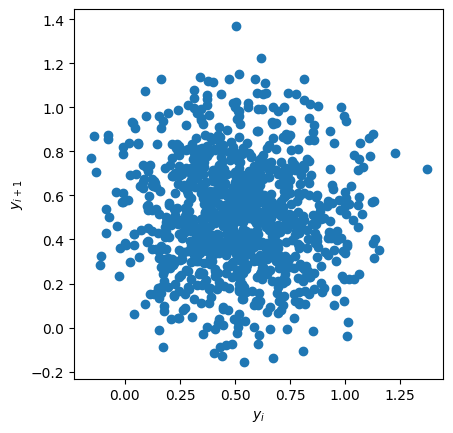

In [23]:
plt.figure()
plt.scatter(y[:-1], y[1:])
plt.xlabel(r'$y_i$')
plt.ylabel(r'$y_{i+1}$')
ax = plt.gca()
ax.set_aspect(1)
plt.show()

In [ ]:
sns.histplot(y)

In [ ]:
# Usando numpy
samples = 10_000
np.random.seed(42)  # For reproducibility
ruido_normal = np.random.normal(loc=0.5, scale=0.25, size=samples)
ruido_uniforme = np.random.uniform(low=0, high=1, size=samples)

In [ ]:
plt.figure()
plt.hist(ruido_normal, alpha=0.5, bins=100)
plt.hist(ruido_uniforme,alpha=0.5,bins=100)
plt.show()

# Permutacion aleatoria




In [ ]:
A = np.arange(10)
print(f"arreglo original: {A}")
np.random.shuffle(A)
print(f"arreglo despues de la permutacion: {A}")

In [ ]:
print(A)
print(np.random.permutation(A))
print(A)

Cual es la diferencia?

Volver al original con `np.sort`

In [ ]:
np.sort(A,)

# Ejercicio
I. Generar puntos aleatorios en un circulo de radio 1.

1. Utilizar coordenadas cartesianas
2. Utilizar coordenadas polares


II. Generar puntos aleatorios en la superficie de una esfera.

1. Utilizar coordenadas cartesianas
2. Utilizar coordenadas esfericas

# Graficos en 3D y en coordenadas polares

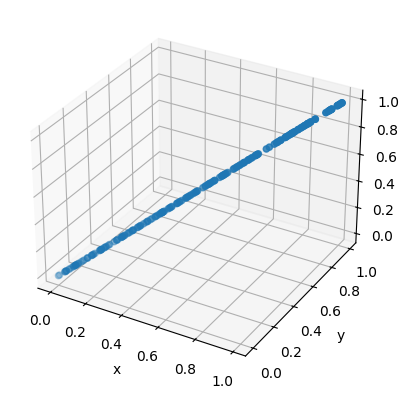

In [16]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,x,x)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [17]:
x_3dplot = np.arange(-3, 3, 0.25)
y_3dplot = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x_3dplot, y_3dplot)
Z = np.exp(-X**2 - Y**2)

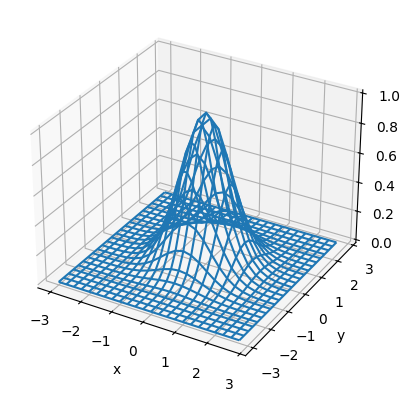

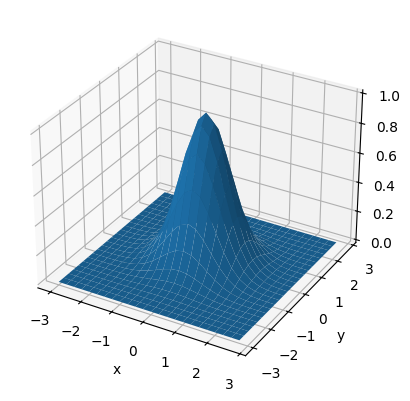

In [18]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

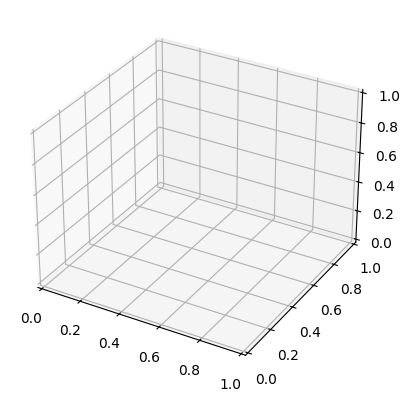

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

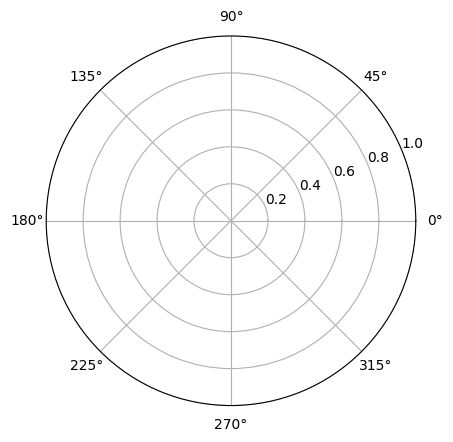

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

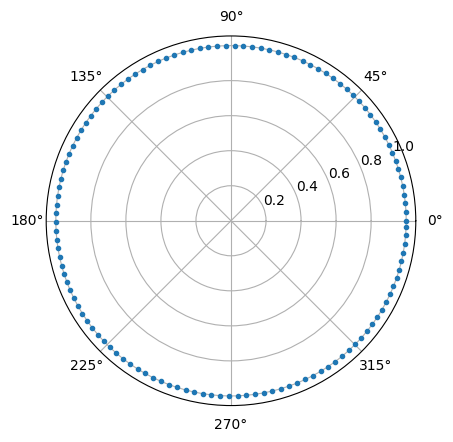

In [21]:
theta = np.arange(0, 2*np.pi, 0.05)
r = np.ones_like(theta)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta,r,'.')
plt.show()
